# Light Curve Exploration

This notebook explores raw stellar light curve data from the Kepler mission.
The goal is to understand the structure, noise characteristics, and potential
transit-like features before applying preprocessing or machine learning.


In [1]:
import sys
sys.path.append("..")
from src.detection import download_lightcurve
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk



/Users/daniel/Developer/Coding Projects/exoplanet-transit-detection/.venv/lib/python3.11/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


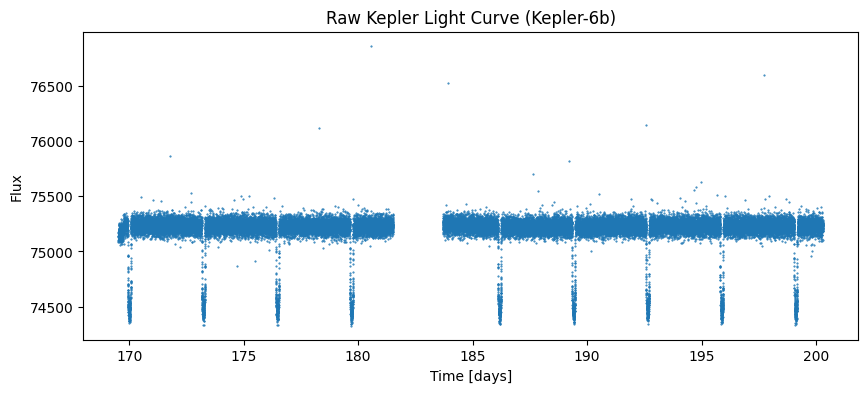

In [8]:
lc = download_lightcurve("Kepler-6b")

plt.figure(figsize=(10, 4))
plt.plot(lc.time.value, lc.flux.value, '.', markersize=1)
plt.xlabel("Time [days]")
plt.ylabel("Flux")
plt.title("Raw Kepler Light Curve (Kepler-6b)")
plt.show()


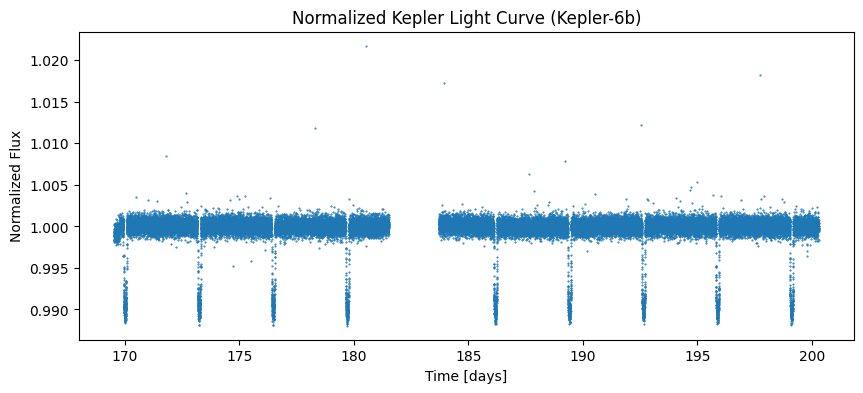

In [9]:
# Remove NaNs
lc_clean = lc.remove_nans()

# Normalize flux
lc_norm = lc_clean.normalize()

# Plot normalized light curve
plt.figure(figsize=(10, 4))
plt.plot(lc_norm.time.value, lc_norm.flux.value, '.', markersize=1)
plt.xlabel("Time [days]")
plt.ylabel("Normalized Flux")
plt.title("Normalized Kepler Light Curve (Kepler-6b)")
plt.show()


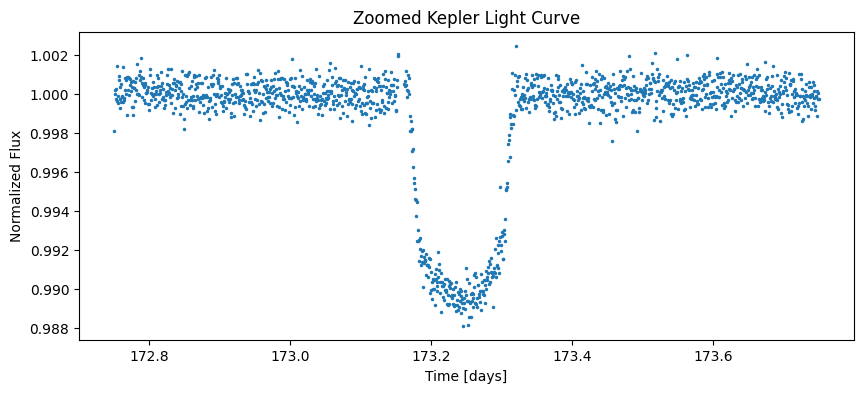

In [10]:
# Zoom in on dip
mask = (lc_norm.time.value > 172.75) & (lc_norm.time.value < 173.75)

plt.figure(figsize=(10, 4))
plt.plot(
    lc_norm.time.value[mask],
    lc_norm.flux.value[mask],
    '.',
    markersize=3
)
plt.xlabel("Time [days]")
plt.ylabel("Normalized Flux")
plt.title("Zoomed Kepler Light Curve")
plt.show()


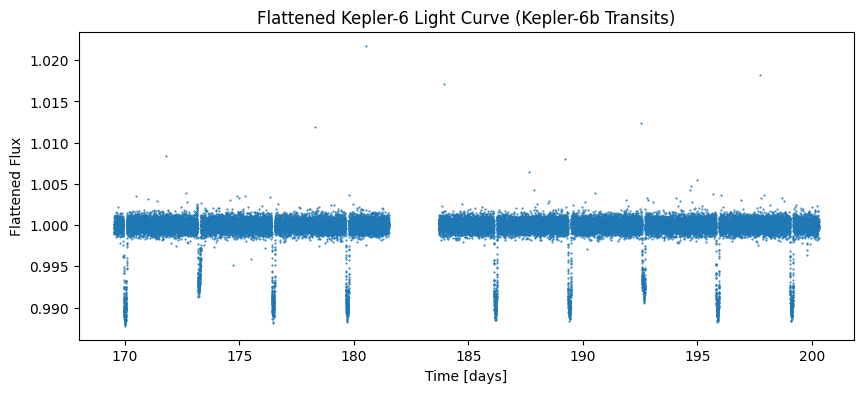

In [11]:
# Clean and normalize
lc_clean = lc.remove_nans().normalize()

# Flatten to remove long-term trends
lc_flat = lc_clean.flatten(window_length=401)

plt.figure(figsize=(10, 4))
plt.plot(lc_flat.time.value, lc_flat.flux.value, '.', markersize=1)
plt.xlabel("Time [days]")
plt.ylabel("Flattened Flux")
plt.title("Flattened Kepler-6 Light Curve (Kepler-6b Transits)")
plt.show()


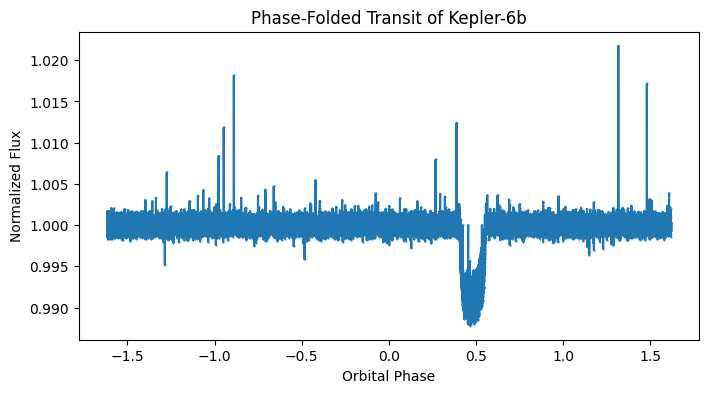

In [12]:
from astropy import units as u

period = 3.234

# Fold the light curve
lc_folded = lc_flat.fold(period=period)

# Plot
# Convert phase to plain float array
phase = lc_folded.phase.value if hasattr(lc_folded.phase, "value") else lc_folded.phase
flux = lc_folded.flux.value if hasattr(lc_folded.flux, "value") else lc_folded.flux

plt.figure(figsize=(8, 4))
plt.plot(
    phase,
    flux,
    marker=".",
    markersize=1
)

plt.xlabel("Orbital Phase")
plt.ylabel("Normalized Flux")
plt.title("Phase-Folded Transit of Kepler-6b")
plt.show()


